<a href="https://colab.research.google.com/github/rajesh0305/MachineLearning_Module2/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK:Visualize the MNIST dataset by using PCA(principal complonent analysis) without using sikitLearn Library.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
df = pd.read_csv("/content/drive/MyDrive/MNIST digit recognizer/train.csv")

In [63]:
df.size

32970000

In [64]:
df.shape

(42000, 785)

In [65]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
l =df['label'];


In [67]:
l.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [68]:
l.shape

(42000,)

In [69]:
d = df.drop('label',axis = 1);
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
d.shape

(42000, 784)

Actual label is  8


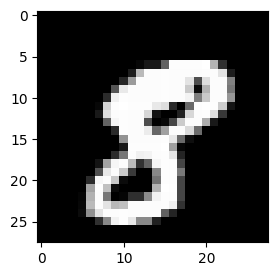

Actual label is  9


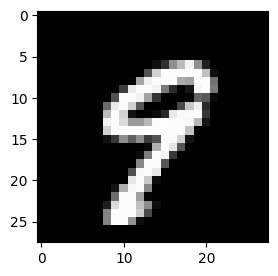

Actual label is  1


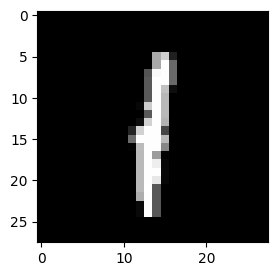

Actual label is  3


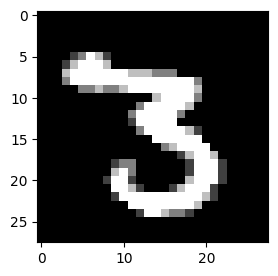

Actual label is  3


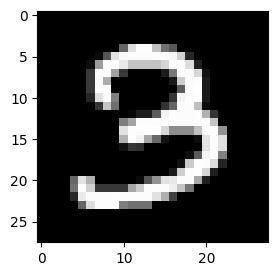

Actual label is  1


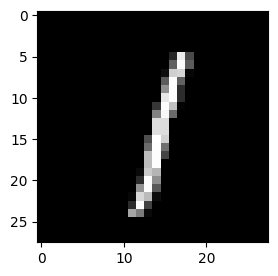

Actual label is  2


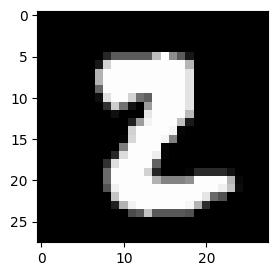

In [71]:
for idx in range(10,17,1):
  plt.figure(figsize = (3,3));
  grid_data =d.iloc[idx]\
              .to_numpy()\
              .reshape(28,28);
  plt.imshow(grid_data,interpolation = "none",cmap = "gray")
  print("Actual label is ",l[idx])
  plt.show();


In [72]:
data = d.head(20000)
label = l.head(20000)
from sklearn.preprocessing import StandardScaler
statndard_data = StandardScaler().fit_transform(data);
print("shape of the label data:=",label.shape)
print("shape of the sample_data:=",data.shape)
print("shape of the column Statndardized data:=",statndard_data.shape);


shape of the label data:= (20000,)
shape of the sample_data:= (20000, 784)
shape of the column Statndardized data:= (20000, 784)


Analysis:here 1):-we are taking first 20k data point for implementing PCA algorithm .
2):-importing snadardscaler library from the sikitlearn library and then apply the concept of the "column Standardization " on 20k datapoint.



In [73]:
covar_matrix = np.matmul(statndard_data.T,statndard_data);
print("the shape of the covariance matrix (S):=",covar_matrix.shape)

the shape of the covariance matrix (S):= (784, 784)


Analysis: **formula for the co-variance matrix is**=(X^T.X)
          X:-is column standardized of the actual data matrix.
         **here size of X**:-(20000x784)
        ** and size of x^T**:-(784x20000)
         **and hence the size of co-variance matrix is** :=(784x784)



In [74]:
from scipy.linalg import eigh
values ,vectors= eigh(covar_matrix,eigvals = (782,783));
print("the shape of the eign values:=",values.shape)
print("the shape of eigen vector is :=",vectors.shape)

vectors = vectors.T
print("the shape of vectors after transpose:=",vectors.shape);

the shape of the eign values:= (2,)
the shape of eigen vector is := (784, 2)
the shape of vectors after transpose:= (2, 784)


<ipython-input-74-9a3431f0a65c>:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values ,vectors= eigh(covar_matrix,eigvals = (782,783));


In [75]:
new_coordinates = np.matmul(vectors,statndard_data.T);
# print("the shape of new_coordinates is:=",new_coordinates.shape)
print("new_coordinate shape:=",vectors.shape,"x",statndard_data.shape,"=",new_coordinates.shape)

new_coordinate shape:= (2, 784) x (20000, 784) = (2, 20000)


In [76]:
new_coordinates = np.vstack((new_coordinates,label)).T
print("the shape of the new_coordinates after adding label column",new_coordinates.shape)

the shape of the new_coordinates after adding label column (20000, 3)


In [77]:
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_principal","2nd_principal","label"));
dataframe.head()

,1st_principal,2nd_principal,label
0,5.430697,5.060862,1.0
1,-6.242999,-19.293148,0.0
2,1.828611,7.684498,1.0
3,-5.585495,0.440132,4.0
4,-6.333250,-26.597773,0.0


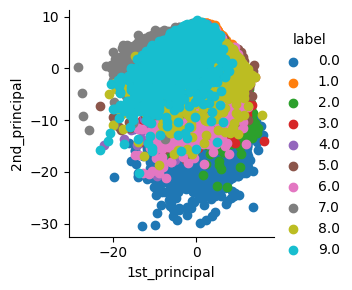

In [78]:
import seaborn as sns
sns.FacetGrid(dataframe,hue = 'label')\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();
plt.show()